In [1]:
from DataProcessing import encodedShake, code2sonnet
import nltk
from nltk.corpus import cmudict
import random

In [2]:
d = cmudict.dict()

encodedSonnets, encodedSyllaDict, code2word, punc2code = encodedShake()

In [3]:
def Vowel_num(pron):
    syl = ""
    for elem in pron:
        if "1" in elem or "2" in elem: syl += "1"
        elif "0" in elem: syl += "0"
    return syl

def Rhyme(pron):
    rhy = ""
    v = 0
    for i in range(len(pron) - 1, -1, -1):
        if "1" in pron[i] or "2" in pron[i] or "0" in pron[i]: 
            v = i
            break
    for j in range(v, len(pron)):
        rhy += pron[j]
    return rhy

In [4]:
rhyme_dic = {} # dictionary of rhyme
syllable_dic = {} # dictionary of syllable (e.g. 1, 0, 10, ...)

for i in range(len(code2word)):
    single_word = code2word[i]
    single_word_syl = []
    single_word_rhyme = []
    if single_word in d:
        for pron in d[single_word]:
            single_word_syl.append(Vowel_num(pron)) 
            single_word_rhyme.append(Rhyme(pron)) 
        for s in single_word_syl:
            if s not in syllable_dic:
                syllable_dic[s] = []
            if single_word not in syllable_dic[s]:
                syllable_dic[s].append(single_word)
        for r in single_word_rhyme:
            if r not in rhyme_dic:
                rhyme_dic[r] = []
            if single_word not in rhyme_dic[r]:
                rhyme_dic[r].append(single_word)

In [5]:
# Generate the last word of rhyme matching the syllable_style

rhyme_lastword = []
key_list = []
key_num = 0
syllable_style = "01010101010"
while key_num < 7:
    key = random.choice(list(rhyme_dic.keys()))
    if key not in key_list:
        if len(rhyme_dic[key]) >= 2:
            words = random.sample(rhyme_dic[key], 2)
            word_1 = words[0]
            word_2 = words[1]
            for item in syllable_dic.values():
                if word_1 in item:
                    syllable_1 = [k for k,v in syllable_dic.items() if v == item][0]
                if word_2 in item:
                    syllable_2 = [k for k,v in syllable_dic.items() if v == item][0]
            if (syllable_1 in syllable_style) & (syllable_2 in syllable_style):
                key_list.append(key)
                rhyme_lastword.append(words)
                key_num = key_num + 1

In [6]:
rhyme_lastword

[['mend', 'tend'],
 ['dispatch', 'catch'],
 ['concealed', 'yield'],
 ['fell', 'sell'],
 ['appeal', 'seal'],
 ['pricked', 'predict'],
 ['loves', "love's"]]

In [7]:
# Order the last word in 14 line
rhyme_lastword_order = []

rhyme_lastword_order.append(rhyme_lastword[0][0])
rhyme_lastword_order.append(rhyme_lastword[1][0])
rhyme_lastword_order.append(rhyme_lastword[0][1])
rhyme_lastword_order.append(rhyme_lastword[1][1])
rhyme_lastword_order.append(rhyme_lastword[2][0])
rhyme_lastword_order.append(rhyme_lastword[3][0])
rhyme_lastword_order.append(rhyme_lastword[2][1])
rhyme_lastword_order.append(rhyme_lastword[3][1])
rhyme_lastword_order.append(rhyme_lastword[4][0])
rhyme_lastword_order.append(rhyme_lastword[5][0])
rhyme_lastword_order.append(rhyme_lastword[4][1])
rhyme_lastword_order.append(rhyme_lastword[5][1])
rhyme_lastword_order.append(rhyme_lastword[6][0])
rhyme_lastword_order.append(rhyme_lastword[6][1])

In [8]:
rhyme_lastword_order

['mend',
 'dispatch',
 'tend',
 'catch',
 'concealed',
 'fell',
 'yield',
 'sell',
 'appeal',
 'pricked',
 'seal',
 'predict',
 'loves',
 "love's"]

In [9]:
from HMM_fast_addition import HiddenMarkovModel, unsupervised_HMM

In [10]:
# Reverse the encodedSonnets
encodedSonnets_reverse = []

for a in encodedSonnets:
    a.reverse()
    encodedSonnets_reverse.append(a)

In [47]:
# Train the HMM using the reversed encodedSonnets and return A and O

A,O = unsupervised_HMM(encodedSonnets_reverse, 16, 100)

Iteration: #  1; Took 0.73s
Iteration: #  2; Took 0.72s
Iteration: #  3; Took 0.74s
Iteration: #  4; Took 0.70s
Iteration: #  5; Took 0.68s
Iteration: #  6; Took 0.69s
Iteration: #  7; Took 0.68s
Iteration: #  8; Took 0.73s
Iteration: #  9; Took 0.73s
Iteration: # 10; Took 0.76s
Iteration: # 11; Took 0.75s
Iteration: # 12; Took 0.77s
Iteration: # 13; Took 0.72s
Iteration: # 14; Took 0.69s
Iteration: # 15; Took 0.74s
Iteration: # 16; Took 0.72s
Iteration: # 17; Took 0.68s
Iteration: # 18; Took 0.79s
Iteration: # 19; Took 0.82s
Iteration: # 20; Took 0.72s
Iteration: # 21; Took 0.74s
Iteration: # 22; Took 0.77s
Iteration: # 23; Took 0.81s
Iteration: # 24; Took 0.73s
Iteration: # 25; Took 0.69s
Iteration: # 26; Took 0.70s
Iteration: # 27; Took 0.69s
Iteration: # 28; Took 0.71s
Iteration: # 29; Took 0.76s
Iteration: # 30; Took 0.79s
Iteration: # 31; Took 0.78s
Iteration: # 32; Took 0.78s
Iteration: # 33; Took 0.75s
Iteration: # 34; Took 0.75s
Iteration: # 35; Took 0.71s
Iteration: # 36; Too

In [12]:
# Generate the 14 line in the reverse order (the first word of each line is of rhyme),each line matchs "010101010101"
# Return emissions, state and word_count (the number of words in each line)

import numpy as np

def generate_14line_s(A,O,rhyme_lastword_order,syllable_dic):
    O = np.asarray(O)
    A = np.asarray(A)
    emission = []
    states = []
    word_count = np.zeros(14)
    
    for line in range(14):
        syllable_count = 0
        syllable_style = "010101010101"
        syllable_style_str = ""
        syllable_style_curr = ""
        emission_initial = rhyme_lastword_order[line]
        emission_initial_id = [k for k,v in code2word.items() if v == emission_initial][0]
        emission.append(emission_initial_id)
        state_initial_maxlikelihood = np.where(O == np.max(O[:,emission_initial_id]))[0][0]
        states.append(state_initial_maxlikelihood)
        
        state_gen = state_initial_maxlikelihood
        
        for item in syllable_dic.values():
            if emission_initial in item:
                syllable_style_curr = [k for k,v in syllable_dic.items() if v == item][0]
                
        syllable_style_str = syllable_style_str + syllable_style_curr
        
        syllable_count = syllable_count + len(syllable_style_curr)
        word_c_line = 1
        
        while syllable_count < 10:
            ran = random.uniform(0, 1)
            A_row = A[state_gen]
            for j in range(len(A_row)):
                ran = ran - A_row[j]
                if ran <= 1e-6:
                    break
            state_gen = j
            states.append(state_gen)
            
            syllable_style_curr = "2"
            while syllable_style_str + syllable_style_curr not in syllable_style:
                ran = random.uniform(0, 1)
                O_row = O[state_gen]
                for j in range(len(O_row)):
                    ran = ran - O_row[j]
                    if ran <= 1e-6:
                        break
                #emission.append(j)
                word = code2word[j]
                
                for item in syllable_dic.values():
                    if word in item:
                        syllable_style_curr = [k for k,v in syllable_dic.items() if v == item][0]
            
            emission.append(j)
            syllable_style_str = syllable_style_str + syllable_style_curr
            syllable_count = syllable_count + len(syllable_style_curr)
            #print(syllable_style_str)
            word_c_line = word_c_line + 1
        #print(word_c_line)
            
        word_count[line] = word_c_line
    word_count = word_count.astype(int)
    return emission,states,word_count

In [13]:
emission,states,word_count = generate_14line_s(A,O,rhyme_lastword_order,syllable_dic)

In [14]:
# Print each line in the reverse order
start = 0
for line in range(14):
    end = start + word_count[line]
    emission_line = emission[start:end]
    emission_line.reverse()
    print(' '.join(code2sonnet(emission_line, code2word)))
    start = end

a sound contented profane sort can mend
correction intend flies worthy were dispatch
believed owe waning remover suppose tend
compounded intend spread matter a catch
rebuked sword already endured concealed
deserves boat desired excel herself fell
content subdued believed remote begins yield
advance complain concealed unrest antique sell
presents drops a deserve asleep appeal
unless confounds drops did repay destroys pricked
maintain fawn gracious perusal subscribes seal
prevent achieve oppressed resort predict
impute contains lack deserving begins loves
disperse preserve surmount neglect delights love's


In [22]:
Q = A

In [23]:
from __future__ import division
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
states = []

for i in range(4):
    for j in range(4):
        states.append((j,i))

In [49]:
states

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (0, 3),
 (1, 3),
 (2, 3),
 (3, 3)]

In [50]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

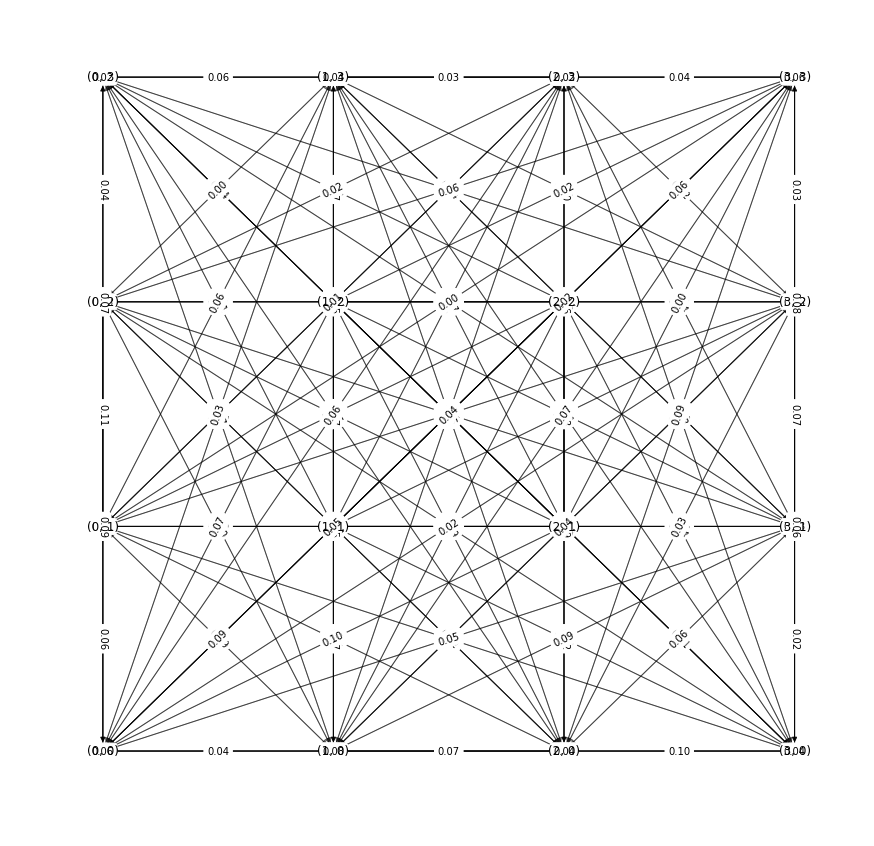

In [53]:
plt.figure(figsize=(15,15))
node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off');
#plt.savefig("../images/mc-matplotlib.svg", bbox_inches='tight')